## This page gives an overview of how to use the code used in the paper "XAI with Machine Teaching when Humans Are (Not) Informed about the Irrelevant Features"

 If you follow each step you can choose an boolean function, generate new random training data, train a new Convolutional Neural Network and find the optimal* teaching set for this CNN.

###### *Optimal in the sence that the Learner defined in the paper and implemented in this code gets the best score for the given teaching set. A combination of the size of the teaching size, and how well the learners choosen boolean formula fits the AI.

- [Setting up the correct environment](#creating-conda)
    - [Step 1: Install Conda](#install-conda)
    - [Step 2: Create a new conda environment](#create-new-conda)
    - [Step 3: Activate the environment](#activate-conda)
- [Activate the jupyter notebook](#activate-the-jupyter-notebook)
- [Selecting a boolean formula](#selecting-boolean-formula)
    - [To change the boolean formula one needs to go to the file](#where-to-change)
- [Generating new training data](#generating-new-training-data)
    - [Step 1: Clean current data](#clean-data)
    - [Step 2: Run fill_dataset.py](#run_fill_dataset)
    - [Step 3: Done](#generating_done)
- [Training a new AI](#training-a-new-ai)
- [Find teaching set](#find-teaching-set)
- [The solution](#the-solution)
    - [The solution can be found in](#solution-location)
- [Print the teaching set](#get-ts)


<a id='creating-conda'></a>
## Setting up the correct envoriment
<a id='install-conda'></a>
 Step 1: Install Conda (pip might work also, but tested for conda). See the guide at [this page](https://conda.io/projects/conda/en/latest/user-guide/install/index.html)
 
<a id='create-new-conda'></a>
 Step 2: Create a new conda enviorment
```console
foo@bar:ExplainableAI$ conda env create -f environment.yml --name ExplainableAIVenv
```
or if you want to use pip
```console
foo@bar:ExplainableAI$ pip install -r requirements_pip.txt
```
<a id='activate-conda'></a>
 Step 3: Activate the enviorment
```console
foo@bar:ExplainableAI$ conda activate ExplainableAIVenv
```


<a id='activate-the-jupyter-notebook'></a>
## Activate the juptyer notebook

```console
(ExplainableAIVenv) foo@bar:ExplainableAI$ jupyter notebook tutorial.ipynb
```

 Once you mangage to open this file in juptyer notebook you are ready to run the code!

<a id='selecting-boolean-formula'></a>
## Selecting a boolean formula

<a id='where-to-change'></a>
### To change the boolean formula one needs to go to the file 
[utils/global_props.py](utils/global_props.py)

 Find the function "booleanFunctionDefiniton" and change the return value to any boolean expression you want using python. 

 For instance: 
```python
return  (A and B)
# OR
return (A and not B) or (not A and B)
```


 NB: If you want to change alphabet, change the global variable "ALL_LETTERS". NB: only works for subset of A,B,C and D due to noe images for other letters in the folder [images](images).

<a id='generating-new-training-data'></a>
# Generateing new training data

<a id='clean-data'></a>
 ### Step 1: Clean current data
 To remove the data run the shell script "clean_all.sh" from the folder ExplainableAI

 Write this in the terminal (WARNING: MAKE SURE YOU ARE IN THE CORRECT FOLDER):
```console
foo@bar:ExplainableAI$ ./clean_all.sh
Folder correct name. Continuing...
Removing images...
rm: *.png: No such file or directory
Removing labels...
rm: *.txt: No such file or directory
Removing training data...
rm: *.bmp: No such file or directory
Done!
```


<a id='run_fill_dataset'></a>
 ### Step 2: Run fill_dataset.py

```console
foo@bar:ExplainableAI$ python fill_dataset.py
Generating images using random placement routine...
Converting images to bitmasks
Generating labels from boolean function...
```
You can take a look in [data/images](data/images) if you want to confirm that the files in fact are being created.

 You have some options here, if you want to have the images in fixed_locations (fixed_square), rotation or not (rotation), and different size or not (scale). 
 NB: this can take some time if the "DATA_SET_SIZE" in [global_props.py](utils/global_props.py) is high. 
<a id='generating_done'></a>
 ### Step 3: Done. 
 The folders [images(original)](data/images), [labels](data/labels) and [training_data(bitmaps)](data/training_data) shuld now contain new traning data.

<a id='training-a-new-ai'></a>
# Training a new AI
run the cells below, and an AI will be trained on the new boolean formula you have selected.

In [18]:
AI_name = "set_name_of_AI"

set_name_of_AI
making the model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 32, 32, 64)        0         
                   

2023-06-22 11:47:49.821871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 34ms/step - loss: 6.7924 - accuracy: 0.6771 - val_loss: 0.7731 - val_accuracy: 0.6719
Epoch 2/20
 1/15 [=>............................] - ETA: 0s - loss: 2.3724 - accuracy: 0.5938

2023-06-22 11:47:50.457393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 29ms/step - loss: 1.1826 - accuracy: 0.7042 - val_loss: 0.6733 - val_accuracy: 0.6406
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 0.6106 - accuracy: 0.7354 - val_loss: 0.5657 - val_accuracy: 0.7656
Epoch 4/20
15/15 [==============================] - 0s 22ms/step - loss: 0.4793 - accuracy: 0.7854 - val_loss: 0.5425 - val_accuracy: 0.7422
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.4422 - accuracy: 0.8188 - val_loss: 0.5185 - val_accuracy: 0.7578
Epoch 6/20
15/15 [==============================] - 0s 24ms/step - loss: 0.4243 - accuracy: 0.8250 - val_loss: 0.4950 - val_accuracy: 0.7500
Epoch 7/20
15/15 [==============================] - 0s 22ms/step - loss: 0.3627 - accuracy: 0.8500 - val_loss: 0.5061 - val_accuracy: 0.7500
Epoch 8/20
15/15 [==============================] - 0s 21ms/step - loss: 0.3401 - accuracy: 0.8625 - val_loss: 0.4801 - val_accuracy: 0.7422
Epoch 9/20
15/15 [======

INFO:tensorflow:Assets written to: models/savedModels/set_name_of_AI/assets


INFO:tensorflow:Assets written to: models/savedModels/set_name_of_AI/assets


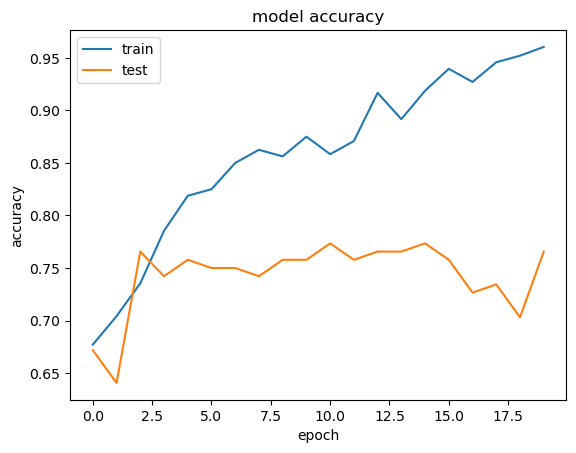

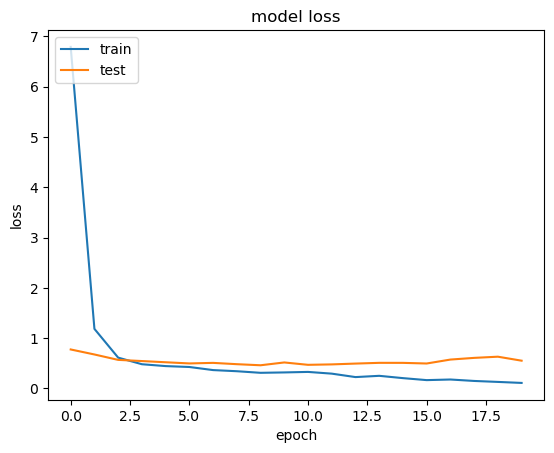

2023-06-22 11:47:57.710924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 6ms/step
Confusion matrix:
[[128  19]
 [ 28  17]]


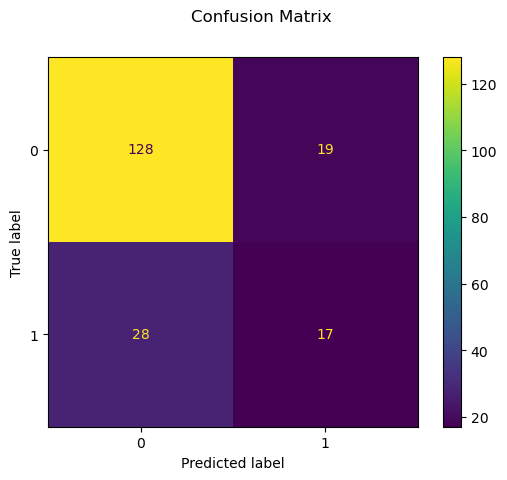

set_name_of_AI

In [19]:
from models.trainModel import run as generate_new_model
from models.CNN.CNNmodel import CNN
data_size = 1000000 # If training size above this, trim it down. 
name = AI_name
print(name)
generate_new_model(constructor=CNN, name=name, save=True, verbose=True,data_size_cap=data_size)

<a id="find-teaching-set"></a>
# Given an AI find the optimal teaching set

In [20]:
import run
import tensorflow
from TA.subset.try_all import TryAll
from TA.subset.random_w_hash import RandomWHashSelect
from TA.subset.random_select import RandomSelect
from TA.delta.sumOfExamples import SumOfExamples as delta
import time

from utils.global_props import set_e, set_B, set_mu

from models.trainModel import load_model
ai_trails_testing = [load_model(AI_name)] # Load the AI

sampling_attempts = [pow(10,15)] #"infinite"
deltas = [delta()]
sub_set_selectors = [TryAll()]

#different_e_values = range(25,0,-1)
#different_B_values = list(range(0,9))
different_mu_values = [1000000]#[0.1,1,10,11,12,13,14,15,16,17,18,19,20,50,100,150,200,300,400,500]



"""
for B in different_B_values:
set_B(B)
for e in different_e_values:
set_e(e)
"""
for mu in different_mu_values:
    print("attempting mu:",mu)
    set_mu(mu)
    run.main_run_system(re_train=False,clean_data=False, deltas=deltas, ai_models=ai_trails_testing,
                         differentNrAttempts=sampling_attempts,subset_selectors=sub_set_selectors, verbose=True)

attempting mu: 1000000
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
loading probability map...
Done loading probability map!
early return at 28 1
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
early return at 366 2
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
impossible to find better score. Early break after 94 attempts. sample size: 3
Failed to get theoretical best on run 3
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
impossible to find better score. Early break after 13 attempts. sample size: 4
Failed to get theoretical best on run 4
mod

(#the-solution)
    - [The solution can be found in](#solution-location)
- [Get the teaching set](#get-ts)
<a id="the-solution"></a>
# The solution 

<a id="solution-location"></a>
### The solution can be found in 
[over_all_best.csv](run_result/best/over_all_best.csv)

### The output will look something like this:

 tag,subset_selectors,boolforest,bool_min,sample_attemps,compatibility,complexity,score,labels,predictions
 mu:1000000-set_name_of_AI-theoreticalFalse,TryAll,{A+B+C+D},A+B+C+D,1000000000000000,0.0,4.1,4.1,-A-B-C-D,0-1-1-1-1

### From this we see that the Boolean formula we aim to teach is A+B+C+D. 
The reason we have {A+B+C+D} is beacuse we sometimes get multiple similary long boolean expression from the Karnough Map, and hence we want to see which among these we choose choose due to lexicographical order. 

### And the Teaching set used is {(#,0),(A,1),(B,1),(C,1),(D,1)}

NB: The atheoreticalFalse is missleading. This is using another search technique which was exhausting the search space. Currently we search by increasing order of the teaching sets, whenever delta(teaching set) >= best score of any teaching set (delta(best)+mu\*lambda(best)), we know we have found the best teaching set. Hence we abort the search.

<a id="get-ts"></a>
# Simple script to extract the found the teaching set

In [21]:
with open("run_result/best/over_all_best.csv", "r") as f:
    all_lines = f.read().split("\n")
    header = all_lines[0]
    last_line = all_lines[-1]
    print(header)
    print(last_line)
    parts = last_line.split(",")
    teaching_examples= parts[-2].split("-")
    teaching_labels = parts[-1].split("-")
    
    teaching_set = ["("+ x+ "," + y +")" for x,y in zip(teaching_examples, teaching_labels)]
    
    teaching_set = "{" + ",".join(teaching_set) + "}"
    print("Teaching_set" + teaching_set)

tag,subset_selectors,boolforest,bool_min,sample_attemps,compatibility,complexity,score,labels,predictions
mu:1000000-set_name_of_AI-theoreticalFalse,TryAll,{AB},AB,1000000000000000,0.32873096827522247,4,328734.96827522246,A-AB-B,0-1-0
Teaching_set{(A,0),(AB,1),(B,0)}
